In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/campaign-data/campaign_data.csv


In [3]:
filename = '/kaggle/input/campaign-data/campaign_data.csv'
df = pd.read_csv(filename)
df = df.drop('CampaignID', axis = 1)
df.head()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [4]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_columns = one_hot_encoder.fit_transform(df[['Category', 'LaunchMonth', 'Country', 'Currency', 'VideoIncluded']])

encoded_df = pd.DataFrame(encoded_columns, columns = 
                         one_hot_encoder.get_feature_names_out(['Category', 'LaunchMonth', 'Country', 'Currency', 'VideoIncluded']))
df = df.drop(['Category', 'LaunchMonth', 'Country', 'Currency', 'VideoIncluded'], axis = 1)
df = pd.concat([df, encoded_df], axis = 1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
len(df.columns)
df

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,IsSuccessful,Category_Art,Category_Film,...,Country_Germany,Country_UK,Country_USA,Currency_AUD,Currency_CAD,Currency_EUR,Currency_GBP,Currency_USD,VideoIncluded_No,VideoIncluded_Yes
0,76159,73518.028955,15,1903,11,41758,3,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,69394,60068.683288,49,469,7,79112,48,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,18652,22958.153470,58,148,17,3942,9,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,19487,24229.048390,39,780,10,22047,35,1,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,26734,17984.630311,68,1622,12,72568,17,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80417,112068.932642,26,870,6,84173,8,1,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,85052,100430.502040,78,1146,8,13913,42,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
99997,68407,102020.936312,87,636,2,45273,13,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99998,59749,67026.111706,51,1276,10,67574,29,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [6]:
X = df.drop('IsSuccessful', axis = 1)
X

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,Category_Art,Category_Film,Category_Games,...,Country_Germany,Country_UK,Country_USA,Currency_AUD,Currency_CAD,Currency_EUR,Currency_GBP,Currency_USD,VideoIncluded_No,VideoIncluded_Yes
0,76159,73518.028955,15,1903,11,41758,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,69394,60068.683288,49,469,7,79112,48,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,18652,22958.153470,58,148,17,3942,9,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,19487,24229.048390,39,780,10,22047,35,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,26734,17984.630311,68,1622,12,72568,17,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80417,112068.932642,26,870,6,84173,8,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,85052,100430.502040,78,1146,8,13913,42,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
99997,68407,102020.936312,87,636,2,45273,13,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99998,59749,67026.111706,51,1276,10,67574,29,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [7]:
y = df['IsSuccessful']
y

0        0
1        0
2        1
3        1
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: IsSuccessful, Length: 100000, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestClassifier 
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rnd_clf.fit(X_train, y_train) 
yhat = rnd_clf.predict(X_test) 
score = accuracy_score(y_test, yhat)
score

0.9324

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

input_shape = X.shape[1:]

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = input_shape))
model.add(Dropout(0.3)) 
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3)) 
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3)) 
model.add(Dense(2, activation = 'softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
import tensorflow as tf

In [32]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras',
                            monitor = 'val_loss',
                            save_best_only=True,
                            mode='min',
                            verbose = 1)

# train the model with checkpoint callback

history = model.fit(X_train, y_train,
                   validation_split = 0.2,
                   epochs = 15,
                   batch_size = 32, 
                   verbose = 2,
                   callbacks = [checkpoint])

model.load_weights('best_model.keras')

yhat = model.predict(X_test)

Epoch 1/15

Epoch 1: val_loss improved from inf to 0.05208, saving model to best_model.keras
2000/2000 - 4s - 2ms/step - accuracy: 0.9666 - loss: 0.0758 - val_accuracy: 0.9773 - val_loss: 0.0521
Epoch 2/15

Epoch 2: val_loss did not improve from 0.05208
2000/2000 - 4s - 2ms/step - accuracy: 0.9689 - loss: 0.0724 - val_accuracy: 0.9737 - val_loss: 0.0594
Epoch 3/15

Epoch 3: val_loss did not improve from 0.05208
2000/2000 - 4s - 2ms/step - accuracy: 0.9695 - loss: 0.0704 - val_accuracy: 0.9744 - val_loss: 0.0534
Epoch 4/15

Epoch 4: val_loss improved from 0.05208 to 0.05200, saving model to best_model.keras
2000/2000 - 4s - 2ms/step - accuracy: 0.9696 - loss: 0.0684 - val_accuracy: 0.9760 - val_loss: 0.0520
Epoch 5/15

Epoch 5: val_loss improved from 0.05200 to 0.05124, saving model to best_model.keras
2000/2000 - 4s - 2ms/step - accuracy: 0.9705 - loss: 0.0685 - val_accuracy: 0.9787 - val_loss: 0.0512
Epoch 6/15

Epoch 6: val_loss improved from 0.05124 to 0.04643, saving model to best_

In [33]:
score = model.evaluate(X_test, y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9832 - loss: 0.0431


In [34]:
yhat = model.predict(X_test)
yhat[:10]

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[9.9999994e-01, 6.1066909e-34],
       [9.9884552e-01, 1.1545341e-03],
       [3.7414742e-01, 6.2585264e-01],
       [9.9999994e-01, 3.3466137e-18],
       [9.9999994e-01, 3.1747177e-25],
       [4.8782787e-16, 9.9999994e-01],
       [9.9999994e-01, 2.3121756e-21],
       [1.0123047e-08, 9.9999994e-01],
       [9.9999994e-01, 3.9575313e-25],
       [1.0231234e-04, 9.9989766e-01]], dtype=float32)

In [35]:
yhat_update = [0] * len(yhat)
for i in range(len(yhat)):
    if yhat[i][0] > 0.5:
        yhat_update[i] = 0
    else:
        yhat_update[i] = 1

In [36]:
accuracy_score(y_test, yhat_update)

0.9829

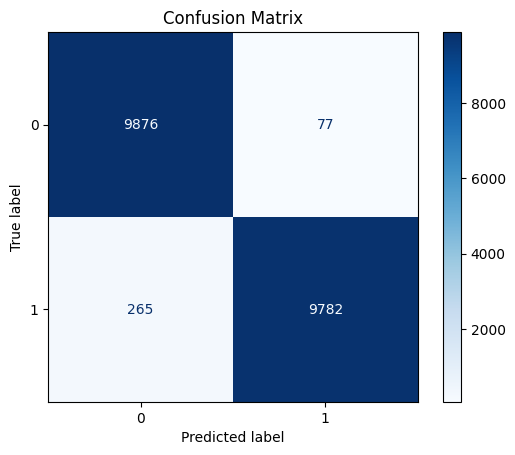

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert yhat to class labels (argmax) -> same as yhat_update but easier! 
yhat_classes = np.argmax(yhat, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, yhat_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()